<a href="https://colab.research.google.com/github/mridulbiswas402/entropy-based-stegnography/blob/main/varbitstego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from math import log
from math import e
from scipy import stats
from PIL import ImageColor
from PIL import Image, ImageFilter
import binascii
import cv2 
from numpy import asarray
from math import floor
import numpy as np 
from google.colab.patches import cv2_imshow  
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
def edgeloc(imagearray):
  edges = cv2.Canny(imagearray,100,200)
  row,col=edges.shape
  lst=[]
  for i in range(row):
    for j in range(col):
      if(edges[i,j]>=250):
        lst.append((i,j))  
  return lst 

def edgepixval(imagearray):
  edgloc=edgeloc(imagearray)
  edglst=[]
  l = len(edgloc)
  for k in range(l):
    i,j=edgloc[k]
    edglst.append(imagearray[i,j])
  return np.array(edglst)  


def calcmask(grayimagearray):
  edgpix = edgepixval(grayimagearray)
  noofbit = floor(log(np.std(edgpix),e))
  mask = ''
  for i in range(8-noofbit):
    mask=mask+'1'
  for i in range(noofbit):
    mask = mask + '0'  
  return int(mask,2)  

In [3]:
def rgb2hex(r, g, b):
	return '#{:02x}{:02x}{:02x}'.format(r, g, b)

def hex2rgb(hexcode):
	return ImageColor.getcolor(hexcode, "RGB")


def str2bin(message):
    binary = bin(int(binascii.hexlify(message.encode("ascii")), 16))
    return binary[2:]  

def bin2str(binary):
	message = binascii.unhexlify('%x' % (int('0b'+binary,2)))
	return message


In [4]:
def varbitextr(pixel,mask):
  noofbits=countzeros(mask)
  dmask=mask ^ 255
  if (noofbits==1):
    return format((pixel & dmask),"0b")
  elif (noofbits==2):
    return format((pixel & dmask),"02b")
  elif (noofbits==3):
    return format((pixel & dmask),"03b") 
  elif (noofbits==4):
    return format((pixel & dmask),"04b")
  else:
    print("error")     


def varbitemb(pixel,data,mask):
  return ((pixel & mask )|data)



def countzeros(mask):
  count0=0
  while (mask != 0):  
    if (mask % 2 == 0):
      count0 += 1
    mask //= 2
  return count0  


def stuffbits(binarymessage,mask):
 # print("  in function stuffbit ")
  n = countzeros(mask)
  #print("on of zero in mask = ",n)
  nbstuff = (n-(len(binarymessage) % n)) 
  #print("nbstuff = ",nbstuff)
  while (nbstuff):
    binarymessage=binarymessage+'0'
    nbstuff=nbstuff-1
  return binarymessage   


In [5]:
def varbitencode1(binmessage,imagearray,mask):
 # print("in function varbitencode1 ")
  row,col=imagearray.shape
 # print("row,col = ",row,col)
  noofbits= countzeros(mask)
 # print("noofbit = ",noofbits)
  lst = stuffbits(binmessage,mask)
  #lst=binmessage
  imagearray[0,0]=mask
  noofpix = format(int((len(lst)/noofbits)),'016b')
 # print("noofpix = ",int(noofpix,2))
  datalen = format(len(binmessage),'016b')
 # print("datalen = ",int(datalen,2))
  imagearray[0,1]=int(noofpix[:8],2)
  imagearray[0,2]=int(noofpix[8:],2)
  imagearray[0,3]=int(datalen[:8],2)
  imagearray[0,4]=int(datalen[8:],2)
  for i in range(1,row):
    for j in range(col):
      temp = imagearray[i,j]
      if (lst):
        data=int(lst[:noofbits],2)
        lst=lst[noofbits:]
        imagearray[i,j]=varbitemb(temp,data,mask)
      else: break
  return imagearray 


 
def varbitdecode1(imagearray):
 # print("  in function varbitdecode1  ")
  #dmask = mask ^ 255
  mask = imagearray[0,0]
 # print("mask = ",mask)
  noofpix = (256*imagearray[0,1]+imagearray[0,2])
 # print("noofpix = ",noofpix)
  datalen = (256*imagearray[0,3]+imagearray[0,4])
 # print("datalen = ",datalen)
  binmessage=''
  #noofbits= countzeros(mask)
  n = countzeros(mask)
 # print("no of zeros in mask = ",n)
  stuffedbit = (n-(datalen % n))
 # print("stuffedbit = ",stuffedbit) 
  row,col=imagearray.shape
 # print("row,col = ",row,col)

  for i in range(1,row):
    for j in range(col):
      temp = imagearray[i,j]
      binmessage=binmessage+varbitextr(temp,mask)
      noofpix=noofpix-1
      if(not noofpix):
        print('success')
        return bin2str(binmessage[:-stuffedbit])
       # print(-stuffedbit)
        #return binmessage[:-stuffedbit] to

In [6]:
image = cv2.imread('lena.png') 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [7]:
#img = Image.open("lena.png")
#image = np.asarray(img)
A=gray.copy()
binary=str2bin("colab.research i am mridul")
mask=0b11111000

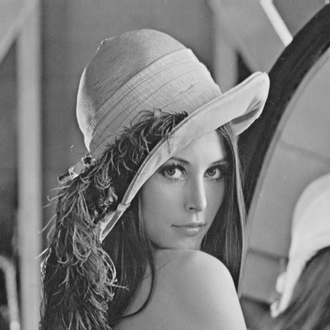

In [8]:
cv2_imshow(A)

In [9]:
outputimg=varbitencode1(binary,A,mask)

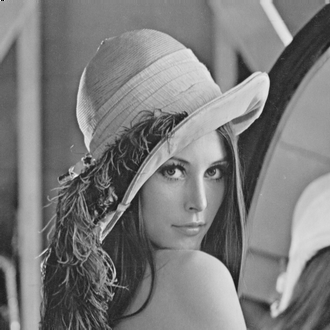

In [10]:
cv2_imshow(outputimg)

In [11]:
mess=varbitdecode1(outputimg)

success


In [12]:
mess

b'colab.research i am mridul'